In [1]:
import socket
import numpy as np
import torch
from pathlib import Path
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader, random_split
import pytorch_lightning as pl
import matplotlib.pyplot as plt

from data_classes import *

In [2]:
num_ctx_frames = 5
num_tgt_frames = 5

In [3]:
bs = 32
twocolour_dm = TwoColourMovingMNISTDataModule(
    batch_size=bs,
    num_ctx_frames=num_ctx_frames,
    num_tgt_frames=num_tgt_frames
)
twocolour_dm.setup()

In [4]:
tl = twocolour_dm.train_dataloader()
train_ctx_batch, train_tgt_batch = next(iter(tl))
train_ctx_batch.shape

torch.Size([32, 3, 5, 128, 128])

### Make a sample plot for the thesis

In [24]:
def make_mnist_plot(ctx, tgt, id):
    def show_frames(frames, ax, start_id):
        for i, frame in enumerate(frames):
            ax[i].imshow(frame)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            ax[i].set_xlabel(f"t={start_id+i}")
            ax[i].xaxis.set_label_coords(.52, 1.15)

    fig, ax = plt.subplots(2, 5,
                        figsize = (8, 3))

    show_frames(ctx[id].permute(1, 2, 3, 0), ax[0], 1)
    show_frames(tgt[id].permute(1, 2, 3, 0), ax[1], 6)

    return fig

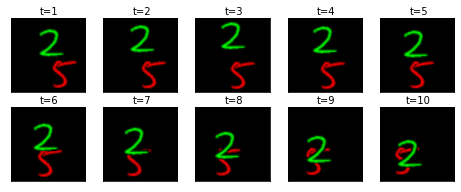

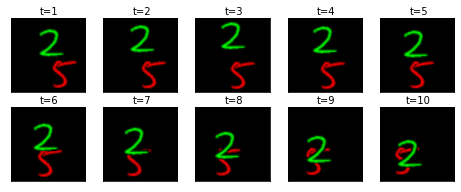

In [25]:
make_mnist_plot(train_ctx_batch, train_tgt_batch, 5)